In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
import koreanize_matplotlib

In [3]:
df2=pd.read_csv('./[최종]창업리스크_지표_2023.csv')
df2.head()

,대분류,폐업률,수익성,포화도
0,교육,0.028911,0.000037,0.002443
1,뷰티/건강,0.016904,0.000091,0.002644
2,생활 서비스,0.016994,0.000006,0.002232
3,소매/도소매,0.025804,0.000123,0.008527
4,숙박/배달,0.018118,0.000016,0.000513


In [4]:
df2.shape

(12, 4)

In [5]:
df2.isna().sum()

대분류    0
폐업률    0
수익성    0
포화도    0
dtype: int64

In [6]:
df=pd.read_csv('./merged_df.csv')
df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,보증금,교육비,보험료,기타비용,총창업비용,주요취급상품
0,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0,0.0,550.0,0.0,44000.0,44550.0,김치찜
1,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0,3300.0,1100.0,0.0,19140.0,23540.0,국밥 등 국물요리류
2,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0,5500.0,3300.0,1000.0,82500.0,92300.0,돼지고기
3,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0,3300.0,2200.0,1000.0,38500.0,45000.0,아구찜
4,외식,한식,아이이에프에스(주),동해강릉초당짬뽕순두부,4,4,0,0,0,0,0,5500.0,3300.0,2000.0,36300.0,47100.0,"짬뽕순두부, 초당순두부"


In [7]:
df.shape

(9045, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   업종대분류       9045 non-null   object 
 1   업종중분류       9045 non-null   object 
 2   법인명         9045 non-null   object 
 3   브랜드명        9045 non-null   object 
 4   가맹점수        9045 non-null   int64  
 5   신규가맹점등록수    9045 non-null   int64  
 6   계약만료수       9045 non-null   int64  
 7   계약해지수       9045 non-null   int64  
 8   상호변경수       9045 non-null   int64  
 9   연평균매출액      9045 non-null   int64  
 10  단위면적당평균매출액  9045 non-null   int64  
 11  보증금         9045 non-null   float64
 12  교육비         9045 non-null   float64
 13  보험료         9045 non-null   float64
 14  기타비용        9045 non-null   float64
 15  총창업비용       9045 non-null   float64
 16  주요취급상품      9045 non-null   object 
dtypes: float64(5), int64(7), object(5)
memory usage: 1.2+ MB


In [9]:
# 연평균매출액 >0 인 데이터만 추출

df = df[df['연평균매출액'] > 0] 
df.shape

(3557, 17)

In [10]:
category_to_group = {
    # 외식업
    '한식': '외식업', '분식': '외식업', '서양식': '외식업', '일식': '외식업',
    '치킨': '외식업', '중식': '외식업', '패스트푸드': '외식업', '피자': '외식업',
    '기타 외국식': '외식업', '기타 외식': '외식업', '주점': '외식업',

    # 카페/디저트
    '커피': '카페/디저트', '음료 (커피 외)': '카페/디저트',
    '제과제빵': '카페/디저트', '아이스크림/빙수 ': '카페/디저트',

    # 소매/도소매
    '편의점': '소매/도소매', '종합소매점': '소매/도소매', '기타도소매': '소매/도소매',
    '(건강)식품': '소매/도소매', '농수산물': '소매/도소매',

    # 뷰티/건강
    '이미용': '뷰티/건강', '화장품': '뷰티/건강', '안경': '뷰티/건강',

    # 유아/아동
    '유아관련': '유아/아동 관련', '유아 관련 (교육 외)': '유아/아동 관련',

    # 교육
    '교육 (교과)': '교육', '교육 (외국어)': '교육', '기타 교육': '교육',

    # 생활 서비스
    '세탁': '생활 서비스', '이사': '생활 서비스', '운송': '생활 서비스',
    '반려동물 관련': '생활 서비스', '인력 파견': '생활 서비스', '기타 서비스': '생활 서비스',

    # 자동차 관련
    '자동차 관련': '자동차/운송',

    # 주거/부동산
    '임대': '주거/부동산', '부동산 중개 ': '주거/부동산',

    # 숙박/배달
    '숙박': '숙박/배달', '배달': '숙박/배달',

    # 엔터테인먼트/오락
    'PC방': '엔터테인먼트/오락', '오락': '엔터테인먼트/오락', '스포츠 관련': '엔터테인먼트/오락',

    # 패션
    '의류 / 패션': '패션/의류',
}

# 업종중분류를 업종대분류로 매핑
df['업종대분류_new'] = df['업종중분류'].map(category_to_group)

In [11]:
df['업종대분류_new'].nunique()

12

In [12]:
df.head(3)

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,보증금,교육비,보험료,기타비용,총창업비용,주요취급상품,업종대분류_new
7,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,7700.0,3300.0,5000.0,51150.0,67150.0,곱창 전문점,외식업
9,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,5500.0,3300.0,2000.0,94950.0,105750.0,"양념 소갈비살, 불고기 등",외식업
11,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,5500.0,1000.0,28930.0,40930.0,족발,외식업


In [13]:
df2.head(3)

,대분류,폐업률,수익성,포화도
0,교육,0.028911,0.000037,0.002443
1,뷰티/건강,0.016904,0.000091,0.002644
2,생활 서비스,0.016994,0.000006,0.002232


In [14]:
# df의 업종대분류_new 와 df2의 대분류 두 컬럼을 기준으로 df에 df2 병합

df = pd.merge(df, df2[['대분류','폐업률','수익성',	'포화도']], left_on='업종대분류_new', right_on='대분류', how='left') 
df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,...,교육비,보험료,기타비용,총창업비용,주요취급상품,업종대분류_new,대분류,폐업률,수익성,포화도
0,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,...,3300.0,5000.0,51150.0,67150.0,곱창 전문점,외식업,외식업,0.050758,0.0001,0.005508
1,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,...,3300.0,2000.0,94950.0,105750.0,"양념 소갈비살, 불고기 등",외식업,외식업,0.050758,0.0001,0.005508
2,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,...,5500.0,1000.0,28930.0,40930.0,족발,외식업,외식업,0.050758,0.0001,0.005508
3,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,...,5500.0,3000.0,53460.0,67460.0,"낙지, 곱창 전문점",외식업,외식업,0.050758,0.0001,0.005508
4,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,...,5500.0,5000.0,170500.0,192000.0,소고기·돼지고기 전문점,외식업,외식업,0.050758,0.0001,0.005508


In [15]:
df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,...,교육비,보험료,기타비용,총창업비용,주요취급상품,업종대분류_new,대분류,폐업률,수익성,포화도
0,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,...,3300.0,5000.0,51150.0,67150.0,곱창 전문점,외식업,외식업,0.050758,0.0001,0.005508
1,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,...,3300.0,2000.0,94950.0,105750.0,"양념 소갈비살, 불고기 등",외식업,외식업,0.050758,0.0001,0.005508
2,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,...,5500.0,1000.0,28930.0,40930.0,족발,외식업,외식업,0.050758,0.0001,0.005508
3,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,...,5500.0,3000.0,53460.0,67460.0,"낙지, 곱창 전문점",외식업,외식업,0.050758,0.0001,0.005508
4,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,...,5500.0,5000.0,170500.0,192000.0,소고기·돼지고기 전문점,외식업,외식업,0.050758,0.0001,0.005508


In [16]:
df.isna().sum()

업종대분류         0
업종중분류         0
법인명           0
브랜드명          0
가맹점수          0
신규가맹점등록수      0
계약만료수         0
계약해지수         0
상호변경수         0
연평균매출액        0
단위면적당평균매출액    0
보증금           0
교육비           0
보험료           0
기타비용          0
총창업비용         0
주요취급상품        0
업종대분류_new     0
대분류           0
폐업률           0
수익성           0
포화도           0
dtype: int64

In [17]:
df.dropna(axis=0, inplace=True) 
df.shape

(3557, 22)

In [18]:
df.to_csv('./merged_df_final.csv', index=False, encoding='utf-8-sig')    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   업종대분류       3557 non-null   object 
 1   업종중분류       3557 non-null   object 
 2   법인명         3557 non-null   object 
 3   브랜드명        3557 non-null   object 
 4   가맹점수        3557 non-null   int64  
 5   신규가맹점등록수    3557 non-null   int64  
 6   계약만료수       3557 non-null   int64  
 7   계약해지수       3557 non-null   int64  
 8   상호변경수       3557 non-null   int64  
 9   연평균매출액      3557 non-null   int64  
 10  단위면적당평균매출액  3557 non-null   int64  
 11  보증금         3557 non-null   float64
 12  교육비         3557 non-null   float64
 13  보험료         3557 non-null   float64
 14  기타비용        3557 non-null   float64
 15  총창업비용       3557 non-null   float64
 16  주요취급상품      3557 non-null   object 
 17  업종대분류_new   3557 non-null   object 
 18  대분류         3557 non-null   object 
 19  폐업률         3557 non-null  

In [20]:
df['업종대분류_new'].nunique()

12

In [21]:
df['업종대분류_new'].value_counts()

업종대분류_new
외식업          2438
카페/디저트        390
교육            168
소매/도소매        164
생활 서비스        157
뷰티/건강         121
엔터테인먼트/오락      51
자동차/운송         25
유아/아동 관련       16
패션/의류          10
숙박/배달           9
주거/부동산          8
Name: count, dtype: int64

<Axes: ylabel='업종대분류_new'>

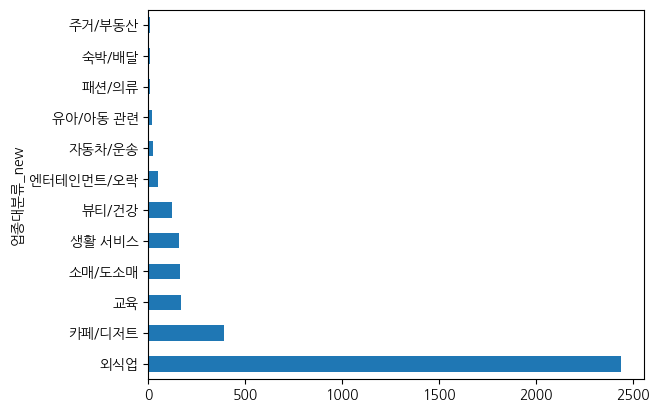

In [22]:
df['업종대분류_new'].value_counts().plot.barh()

### 크러스터링의 목적부터 정의해야 함
- 창업 비용이 비슷한 브랜드 군집

- 매출 성과가 유사한 군집

- 폐업률·계약해지율 중심의 리스크 기반 군집

## 전반적인 창업 위험/수익/비용을 통합적으로 고려한 군집

-> 목적에 따라 선택하는 변수와 전처리 방식이 달라진다

#### 비용	: 보증금, 교육비, 보험료, 기타비용, 총창업비용	초기 비용


In [ ]:
# 업종대분류, 교육비,보증금, 보험료, 기타비용, 총창업비용


In [24]:
# 파생변수 생성

# 1. 총창업비용 대비 각 항목 비율
df['보증금비율'] = df['보증금'] / df['총창업비용']
df['교육비비율'] = df['교육비'] / df['총창업비용']
df['보험료비율'] = df['보험료'] / df['총창업비용']

# 2. 교육비 + 보험료를 기타비용으로 묶음
df['기타비용'] = df['교육비'] + df['보험료']


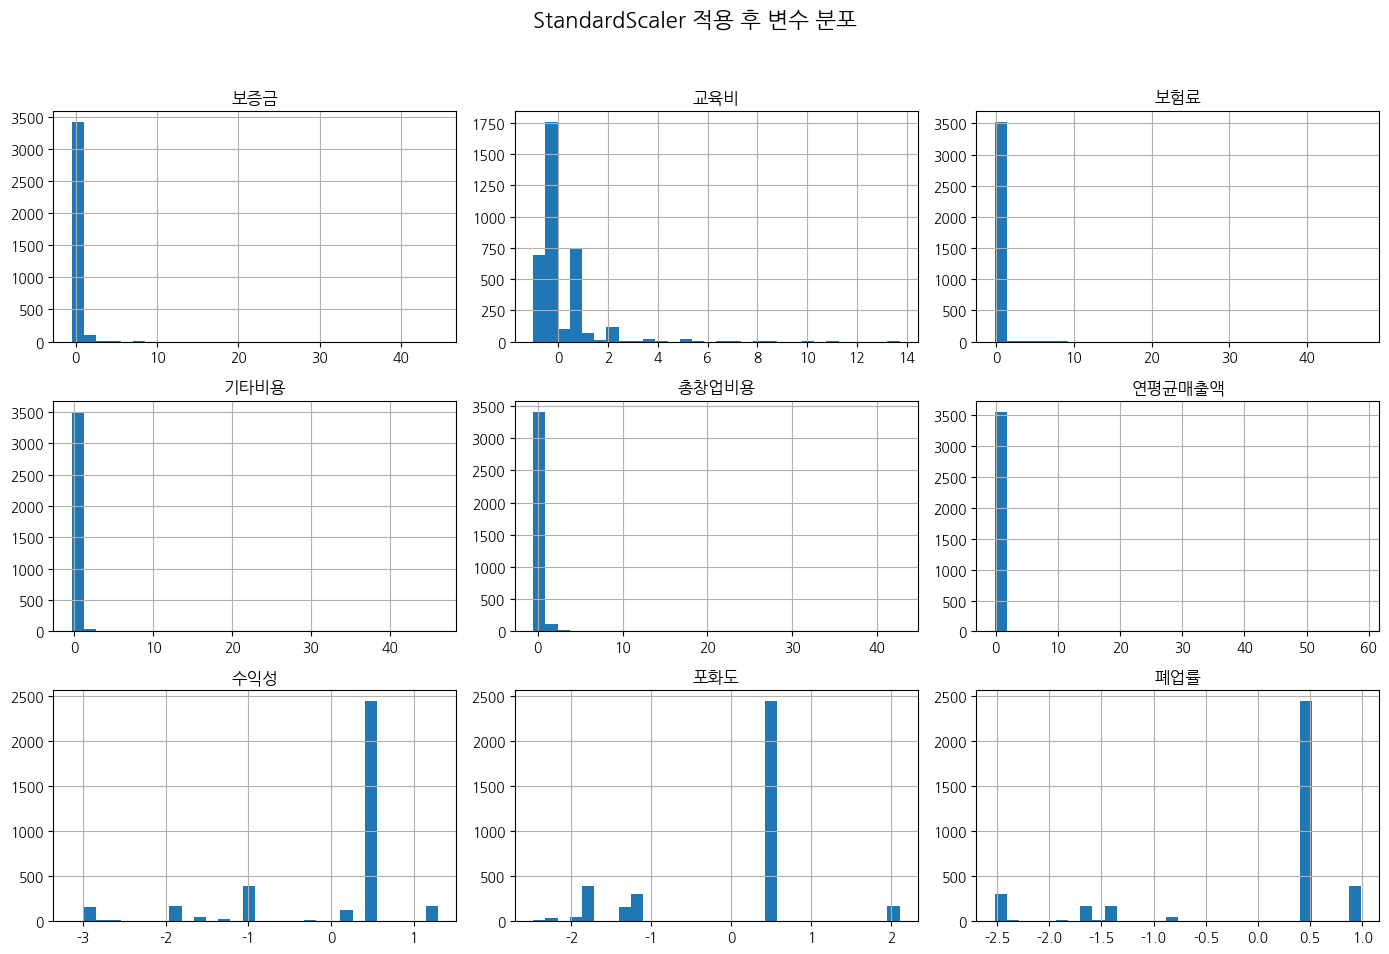

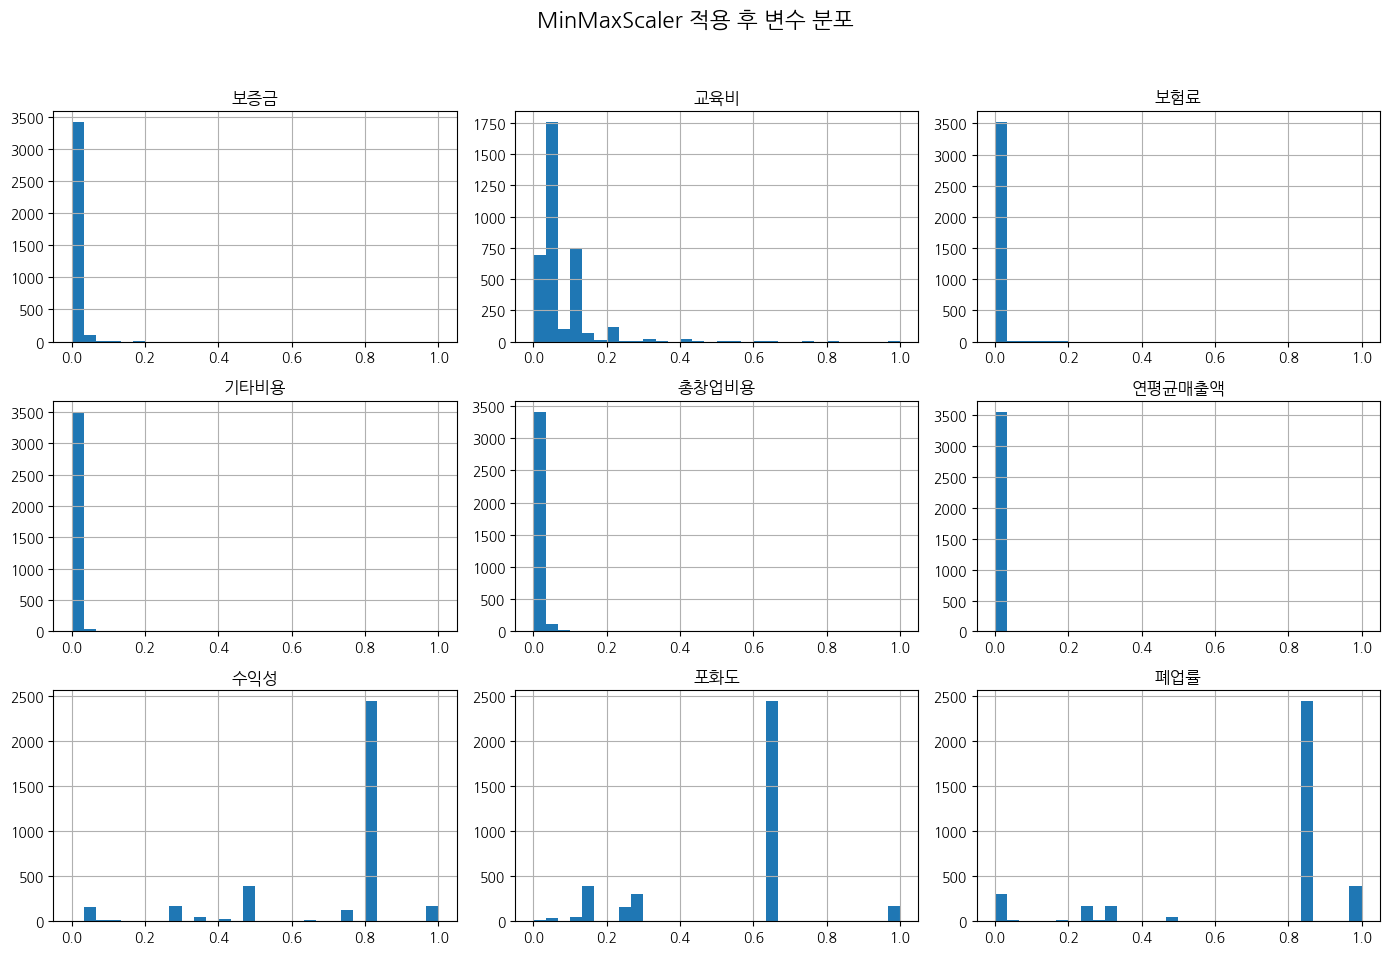

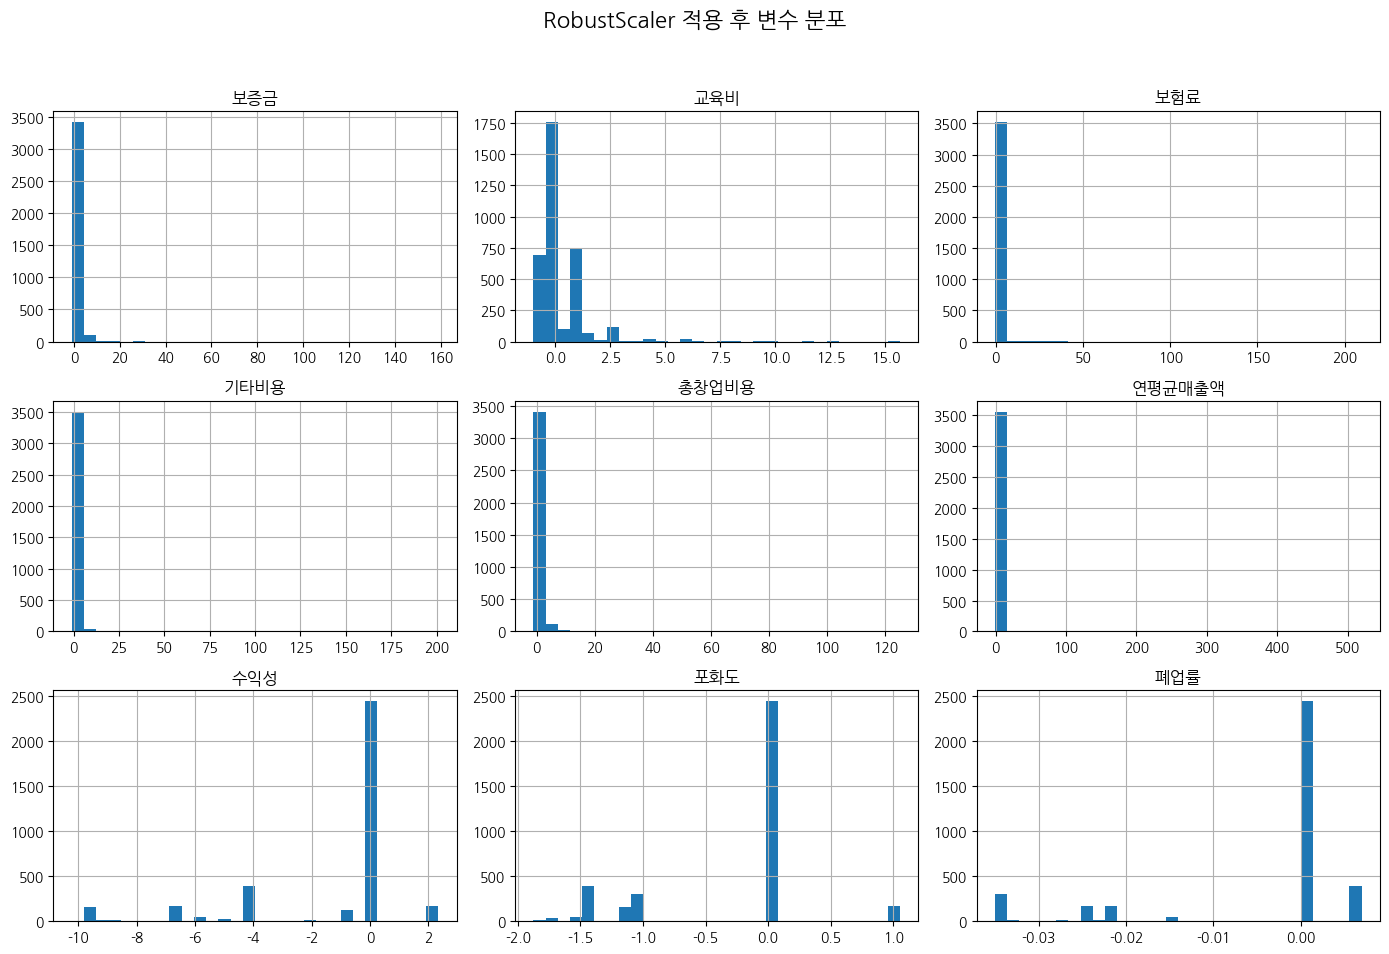

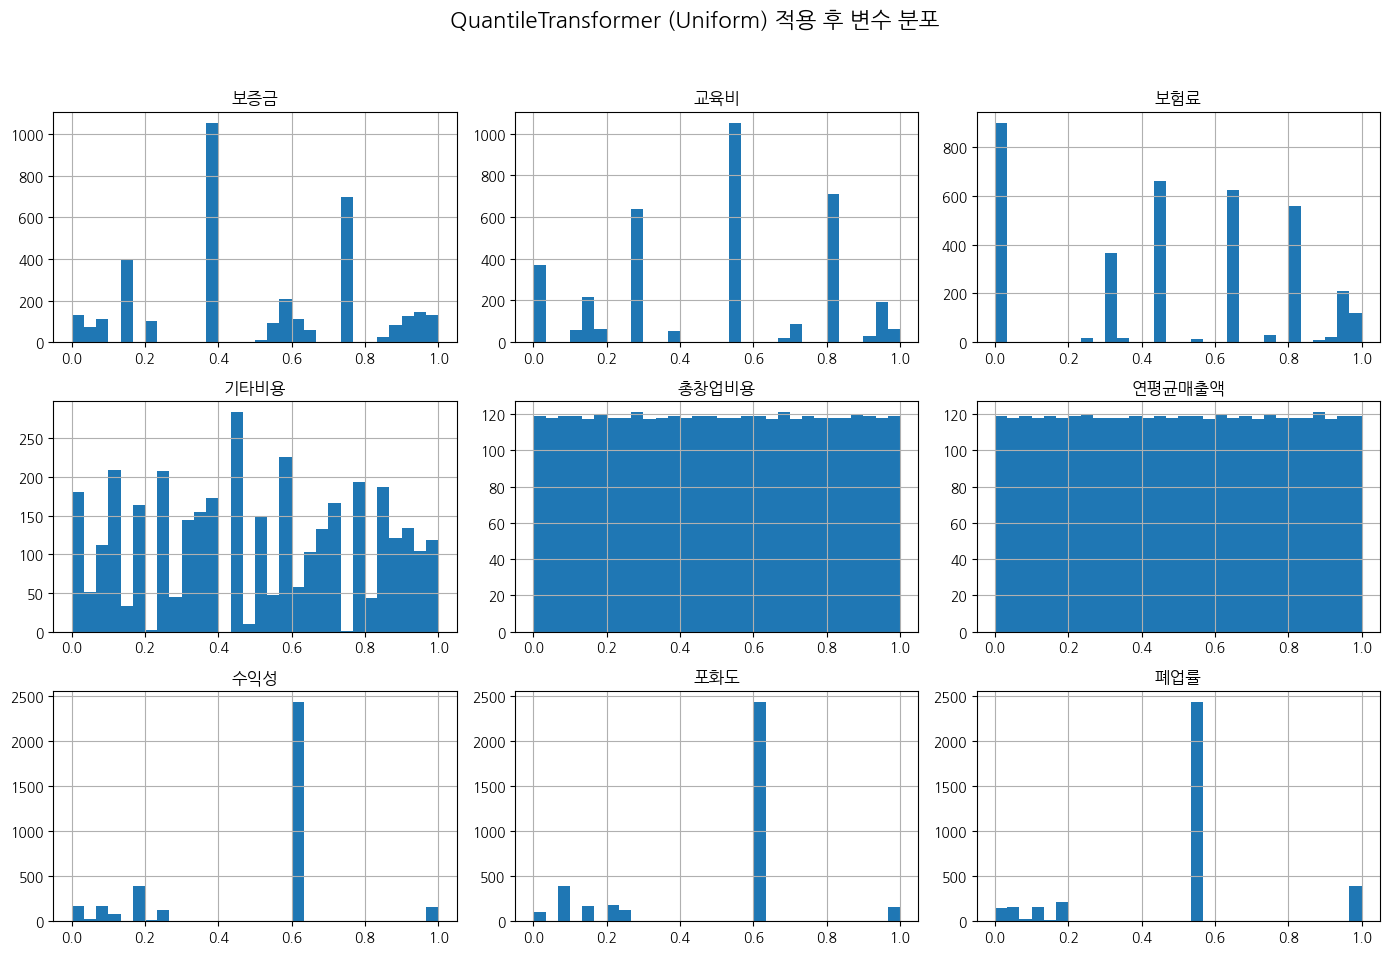

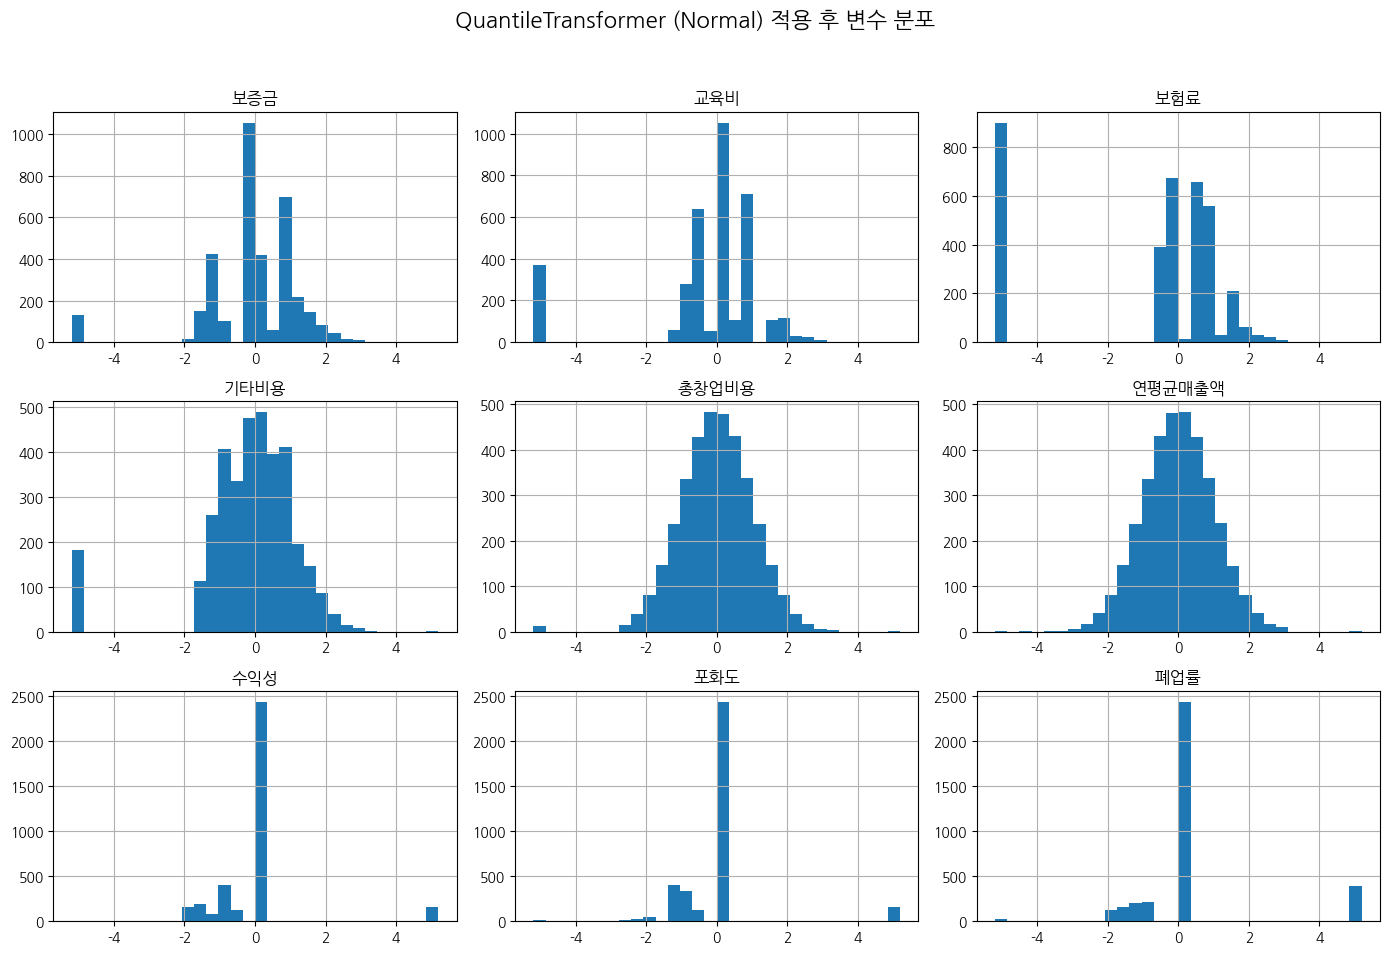

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 클러스터링에 사용할 변수 정의
cluster_cols = [
    '보증금', 
    '교육비', 
    '보험료', 
    '기타비용', 
    '총창업비용' ,
   # '보증금비율',# 파생
    #'교육비비율', # 파생
    #'보험료비율', # 파생,
    '연평균매출액',
    '수익성',
    '포화도',
    '폐업률'
    
            
]

X = df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer (Uniform)": QuantileTransformer(output_distribution='uniform', random_state=0),
    "QuantileTransformer (Normal)": QuantileTransformer(output_distribution='normal', random_state=0)
}

for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    X_scaled_df.hist(bins=30, figsize=(14, 10))
    plt.suptitle(f"{name} 적용 후 변수 분포", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [26]:
# 보증금, 교육비, 보험료, 수익성, 폐업률


Text(0.5, 1.0, '상관계수 행렬')

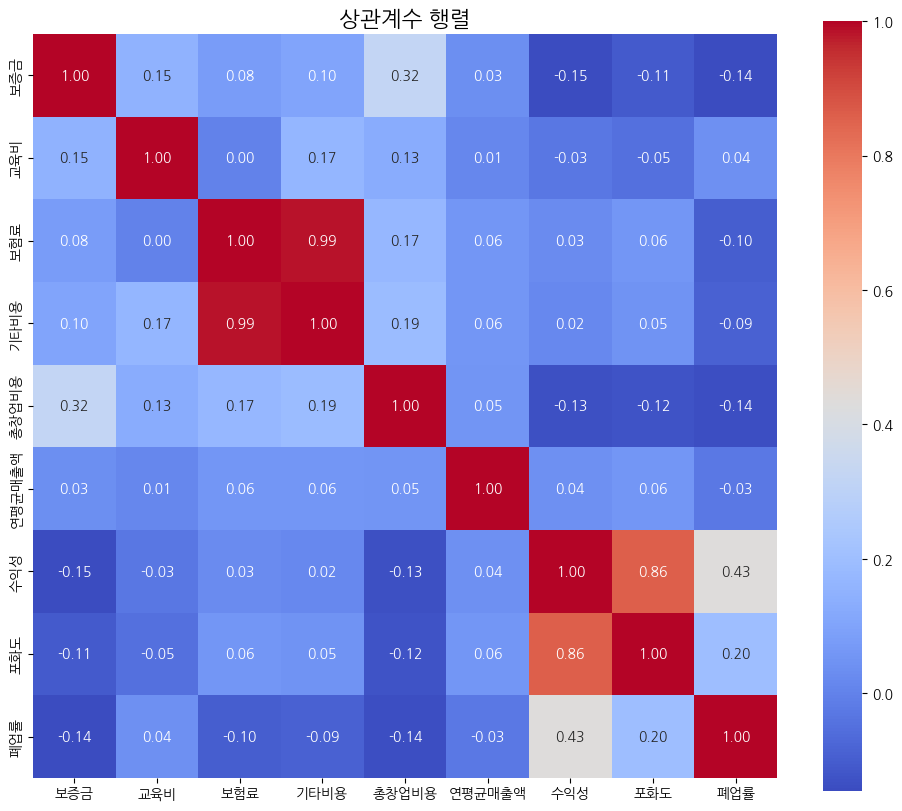

In [27]:
X[cluster_cols].corr()
# 상관계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(X[cluster_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)    
plt.title("상관계수 행렬", fontsize=16)

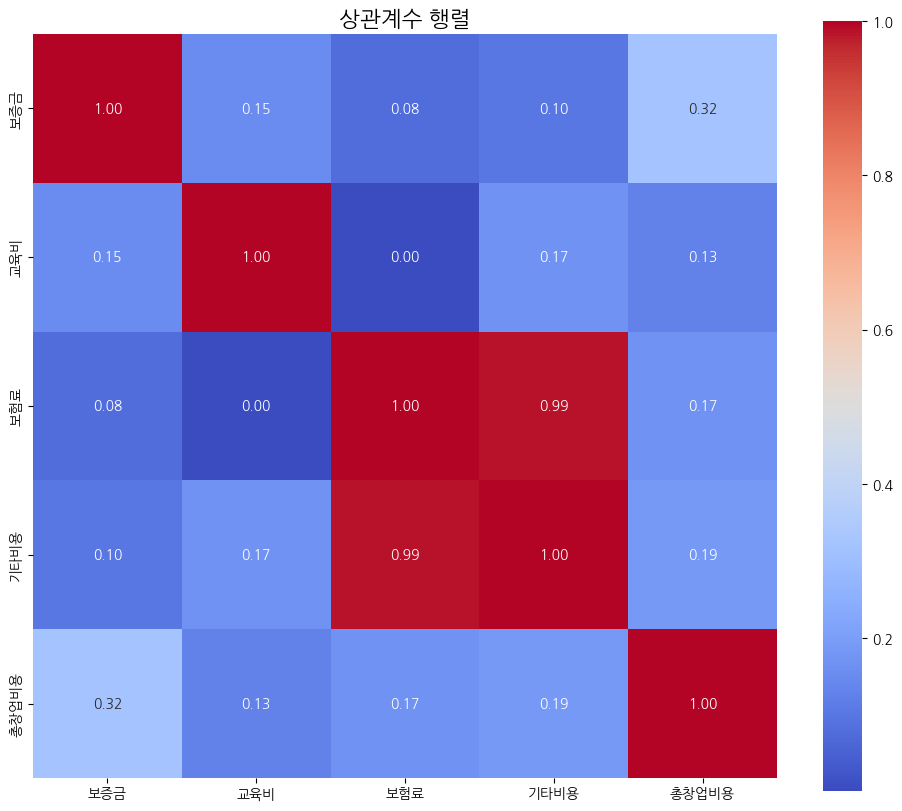

In [28]:
# 입력 데이터 상관관계 시각화
# 보증금, 교육비, 보험료, 기타비용, 총창업비용
cluster_cols = [
    '보증금', 
    '교육비', 
    '보험료', 
    '기타비용', 
    '총창업비용' ,
]
    
            

plt.figure(figsize=(12, 10))    
sns.heatmap(X[cluster_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)    
plt.title("상관계수 행렬", fontsize=16)
plt.show()


In [28]:
# 기타비용과 총창업비용은 둘 중 하나만 사용
# 보험료와 기타비용은 0.99
# 수익성과 포화도는 0.89

In [29]:
# 기타비용 컬럼 삭제
# 보험료 + 교육비 컬럼 생성
# 보험료 + 교육비 + 보증금 컬럼 생성-> 추가 시 성능 안 좋음
# 보험료 + 보증금 컬럼 생성 -> 0.35~0.4 정도.. 모양은 예쁨 
# 보증금 + 교육비 컬럼 생성


# df.drop(columns=['기타비용'], inplace=True)
df['보험료+교육비'] = df['보험료'] + df['교육비']
df['보험료+교육비+보증금'] = df['보험료+교육비'] + df['보증금']
df['보험료+보증금'] = df['보험료'] + df['보증금']
df['보증금+교육비'] = df['보증금'] + df['교육비']


In [30]:
# 기타비용, 총창업비용, 보증금비율, 교육비비율 
# 보증금, 교육비, 보험료, 총창업비용, 기타비용

cluster_cols = ['총창업비용','보증금','교육비','보험료'] 


In [31]:
# QuantileTransformer (Normal) 선택
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
X_scaled = scaler.fit_transform(df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna())

# 스케일링된 DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=cluster_cols)


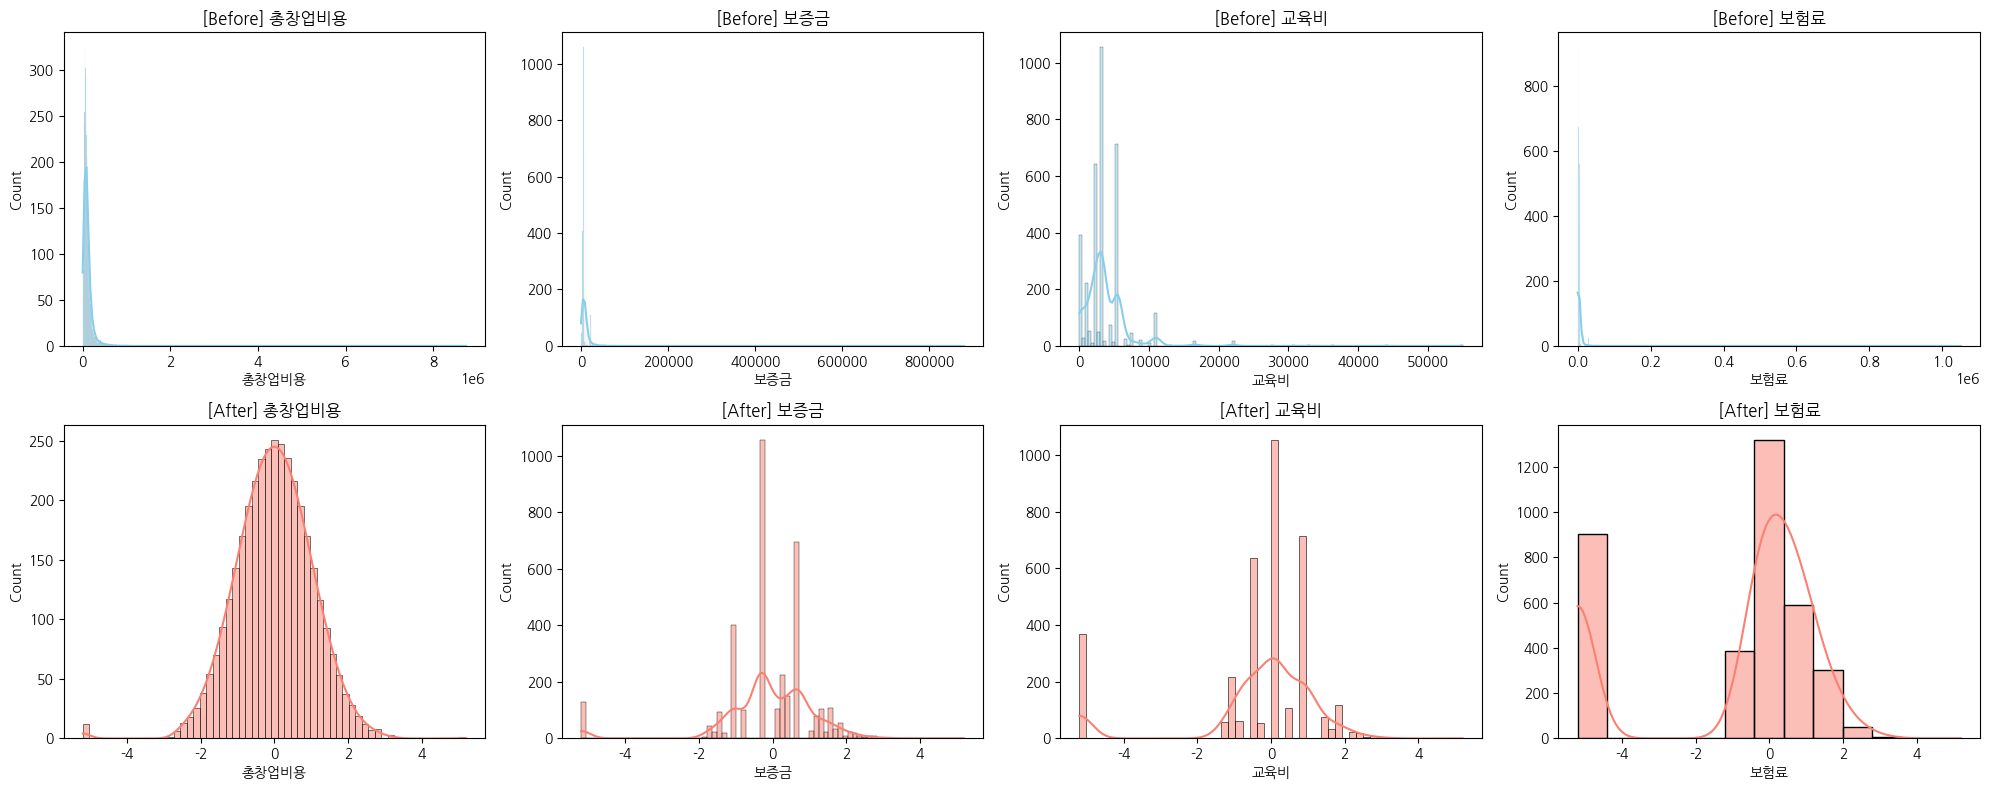

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 목록
cluster_cols = ['총창업비용','보증금','교육비','보험료']

# 스케일 전 데이터
X_original = df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna()

# 스케일 후 데이터
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
X_scaled = scaler.fit_transform(X_original)
X_scaled_df = pd.DataFrame(X_scaled, columns=cluster_cols)

# 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # 2행 4열

for i, col in enumerate(cluster_cols):
    # 스케일 전
    sns.histplot(X_original[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"[Before] {col}")
    
    # 스케일 후
    sns.histplot(X_scaled_df[col], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f"[After] {col}")

plt.tight_layout()
plt.show()


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


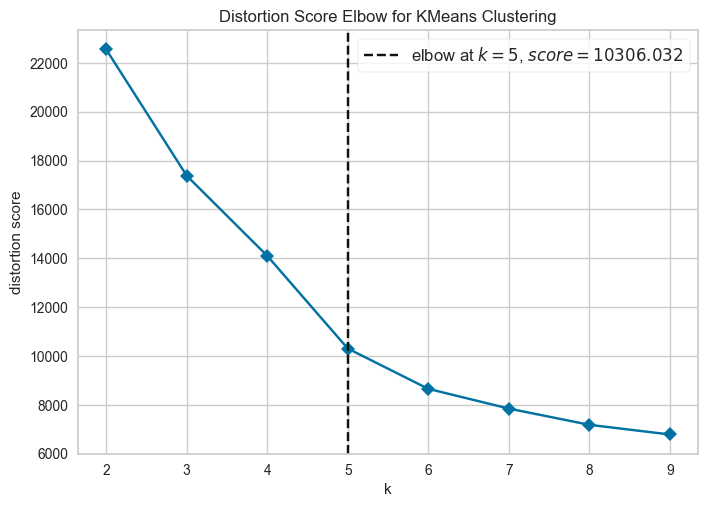

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# KMeans 객체 정의
kmeans = KMeans(random_state=0, n_init='auto')

# Elbow Method 시각화
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

In [33]:

n_cluster=5
k_means=KMeans(n_clusters=n_cluster,n_init='auto',random_state=111)
k_means.fit(X_scaled)



/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


KMeans(n_clusters=5, random_state=111)

In [34]:

# 클러스터 중심과 SSE 출력
centroids = k_means.cluster_centers_
inertia = k_means.inertia_

In [92]:
from sklearn.metrics import silhouette_score

silhouettes_avg=silhouette_score(X_scaled,k_means.labels_)

silhouettes_avg

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


np.float64(0.3974834356890103)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


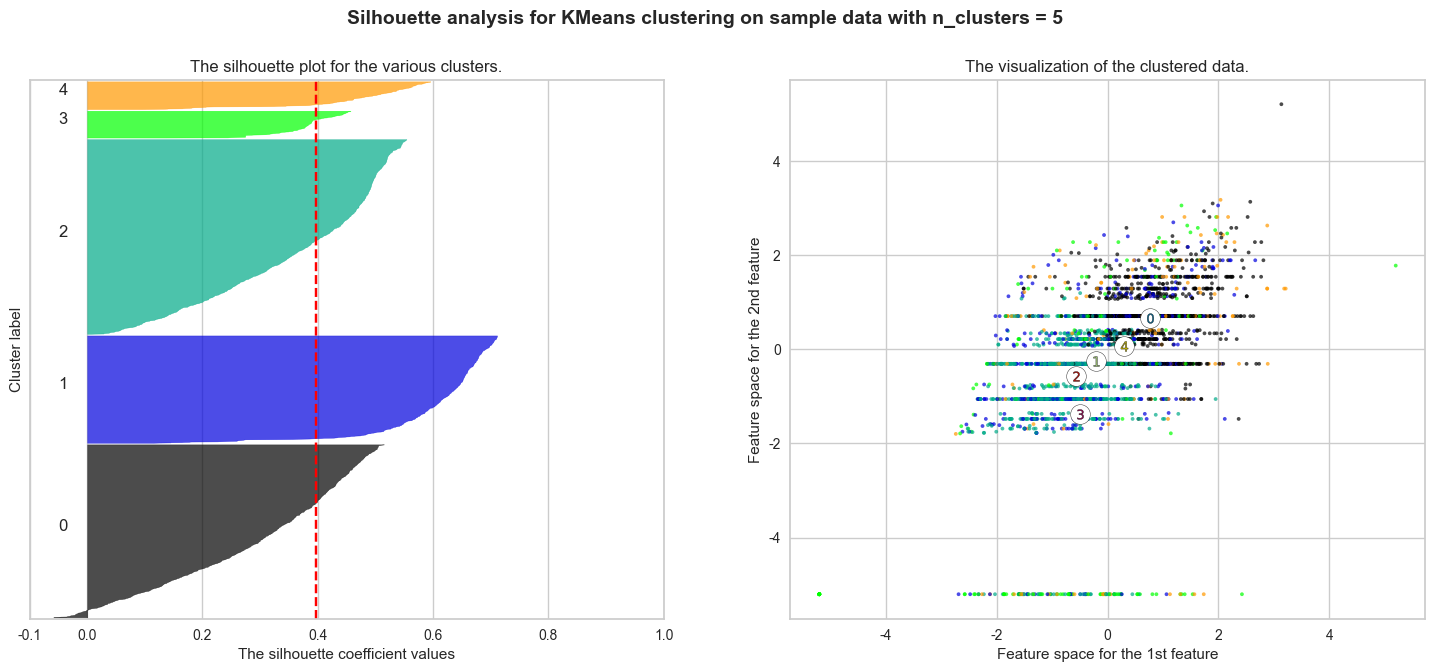

In [93]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (n_cluster + 1) * 10])

cluster_labels = k_means.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouettes_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(
    X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = k_means.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_cluster,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [94]:
# 1. 스케일링 시 사용한 유효 인덱스 저장 (결측치 제거 후 남은 행)
valid_index = df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna().index

# 2. 라벨을 포함한 DataFrame 생성
cluster_labels = k_means.labels_  # 또는 dbscan.labels_
cluster_df = pd.DataFrame({'cluster': cluster_labels}, index=valid_index)

# 3. 원본 df에 병합 (유효 인덱스 기준으로)
df_with_cluster = df.join(cluster_df)

In [95]:
df_with_cluster.head()


,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,...,수익성,포화도,보증금비율,교육비비율,보험료비율,보험료+교육비,보험료+교육비+보증금,보험료+보증금,보증금+교육비,cluster
0,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,...,0.0001,0.005508,0.114669,0.049144,0.074460,8300.0,16000.0,12700.0,11000.0,2
1,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,...,0.0001,0.005508,0.052009,0.031206,0.018913,5300.0,10800.0,7500.0,8800.0,2
2,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,...,0.0001,0.005508,0.134376,0.134376,0.024432,6500.0,12000.0,6500.0,11000.0,2
3,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,...,0.0001,0.005508,0.081530,0.081530,0.044471,8500.0,14000.0,8500.0,11000.0,2
4,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,...,0.0001,0.005508,0.057292,0.028646,0.026042,10500.0,21500.0,16000.0,16500.0,0


In [96]:
df_with_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종대분류        3557 non-null   object 
 1   업종중분류        3557 non-null   object 
 2   법인명          3557 non-null   object 
 3   브랜드명         3557 non-null   object 
 4   가맹점수         3557 non-null   int64  
 5   신규가맹점등록수     3557 non-null   int64  
 6   계약만료수        3557 non-null   int64  
 7   계약해지수        3557 non-null   int64  
 8   상호변경수        3557 non-null   int64  
 9   연평균매출액       3557 non-null   int64  
 10  단위면적당평균매출액   3557 non-null   int64  
 11  보증금          3557 non-null   float64
 12  교육비          3557 non-null   float64
 13  보험료          3557 non-null   float64
 14  기타비용         3557 non-null   float64
 15  총창업비용        3557 non-null   float64
 16  주요취급상품       3557 non-null   object 
 17  업종대분류_new    3557 non-null   object 
 18  대분류          3557 non-null   object 
 19  폐업률   

In [97]:
df_with_cluster.to_csv('./cluster_df_2.csv', index=False, encoding='utf-8-sig')   

In [98]:
# 스케일링 이후 누락된 행을 제외한 원본 df
df_valid = df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna().copy()
#df_valid = df_with_category[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna().copy()

# 클러스터 레이블 할당
df_valid["cluster"] = k_means.labels_

# 클러스터별 특성 평균 확인
cluster_summary = df_valid.groupby("cluster")[cluster_cols].mean().round(2)
print("[클러스터별 특성 요약]")
print(cluster_summary)

[클러스터별 특성 요약]
             총창업비용       보증금      교육비       보험료
cluster                                        
0        160601.39  13996.94  5593.20   6205.99
1         89447.58   8278.85  4169.31      0.00
2         59602.20   5130.29  2970.86   2488.09
3        140052.20  13151.46     0.00      0.00
4        196059.53  17668.77     0.00  24168.98


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserW

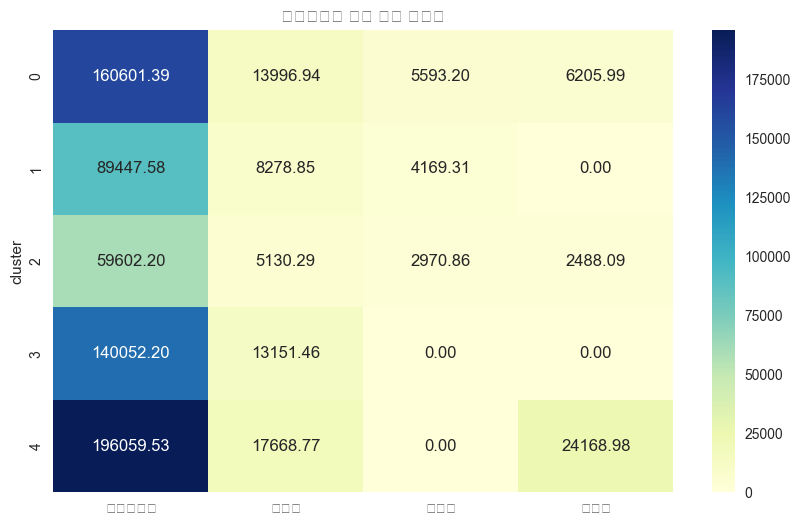

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("클러스터별 주요 변수 평균값")
plt.show()

In [100]:
print("[클러스터별 샘플 수]")
print(df_valid["cluster"].value_counts())

[클러스터별 샘플 수]
cluster
2    1307
0    1161
1     721
4     187
3     181
Name: count, dtype: int64
